In [2]:
import pandas as pd
import os
from datetime import datetime

In [3]:
def calculate_values(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    score_value=0
   
   
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("consumedTime:"):
            score_text,score_value=data[i][0].split(":")
            accuracy_text,accuracy_score=data[i][1].split(":")
            score_value=int(score_value)
            accuracy_score=float(accuracy_score)
            
            results.append([
                subject,
                order,
                method,
                score_value,
                accuracy_score
                ])
        
    return results
            
    
    
    

In [4]:

# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1
          
            order=sorted_indices.index(i-1)
            df = read_txt_to_dataframe(file_path)
            all_results.extend(calculate_values(df,subject_name, method,order))
        

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [5]:

subject_names=["朴さん","水上","佐々木","村上","万くん","竹村","平岡拓海","吉村厚紀","岡本","菊池たくま","伊藤吉彦","ほういしん","小谷健太朗","河合希俊","歩さん","上園千鶴さん"]

# subject_names=["上園千鶴さん"]

for i in range(len(subject_names)):
        # root_path = r"C:\Users\takaharayota\Research\Exp2-data\{}\Values".format(subject_names[i])
        # files_paths = [
        #         root_path + r"\音無し.txt",
        
        # root_path + r"\離散指数.txt",
        # root_path + r"\連続指数.txt",
        # root_path + r"\連続線形.txt",
        #         root_path + r"\離散線形.txt",
        
        # ]
        root_path=r"/Users/takaharayouta/Documents/Research/Exp2-data/{}/Values".format(subject_names[i])
  
        files_paths = [
                root_path + r"/音無し.txt",
        
        root_path + r"/離散指数.txt",
        root_path + r"/連続指数.txt",
        root_path + r"/連続線形.txt",
                root_path + r"/離散線形.txt",
        
        ]
        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)


    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Method', 'Score','Accuracy']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output-ave.txt', sep='\t', index=False)

print("DataFrameの内容がoutput-ave.txtに出力されました。")


[['朴さん', 4, -1, 4, 1.0], ['朴さん', 0, 0, 3, 1.0], ['朴さん', 2, 1, 14, 1.0], ['朴さん', 1, 2, 12, 0.8571429], ['朴さん', 3, 3, 13, 0.9285714], ['水上', 4, -1, 11, 0.5789474], ['水上', 0, 0, 30, 1.0], ['水上', 2, 1, 24, 0.9230769], ['水上', 1, 2, 26, 1.0], ['水上', 3, 3, 29, 0.9354839], ['佐々木', 4, -1, 2, 1.0], ['佐々木', 0, 0, 12, 1.0], ['佐々木', 2, 1, 10, 0.7142857], ['佐々木', 1, 2, 9, 1.0], ['佐々木', 3, 3, 6, 1.0], ['村上', 4, -1, 4, 0.5714286], ['村上', 0, 0, 9, 0.6428571], ['村上', 2, 1, 4, 0.4444444], ['村上', 1, 2, 14, 0.9333333], ['村上', 3, 3, 2, 0.2222222], ['万くん', 4, -1, 3, 0.3333333], ['万くん', 0, 0, 2, 0.2857143], ['万くん', 2, 1, 1, 0.25], ['万くん', 1, 2, 3, 0.3333333], ['万くん', 3, 3, 5, 0.8333333], ['竹村', 4, -1, 3, 0.15], ['竹村', 0, 0, 12, 0.8571429], ['竹村', 2, 1, 13, 0.9285714], ['竹村', 1, 2, 8, 0.8888889], ['竹村', 3, 3, 12, 0.8571429], ['平岡拓海', 4, -1, 5, 0.3846154], ['平岡拓海', 0, 0, 11, 1.0], ['平岡拓海', 2, 1, 13, 1.0], ['平岡拓海', 1, 2, 3, 0.6], ['平岡拓海', 3, 3, 4, 0.4444444], ['吉村厚紀', 4, -1, 6, 0.6], ['吉村厚紀', 0, 0, 4, 0.5714286]

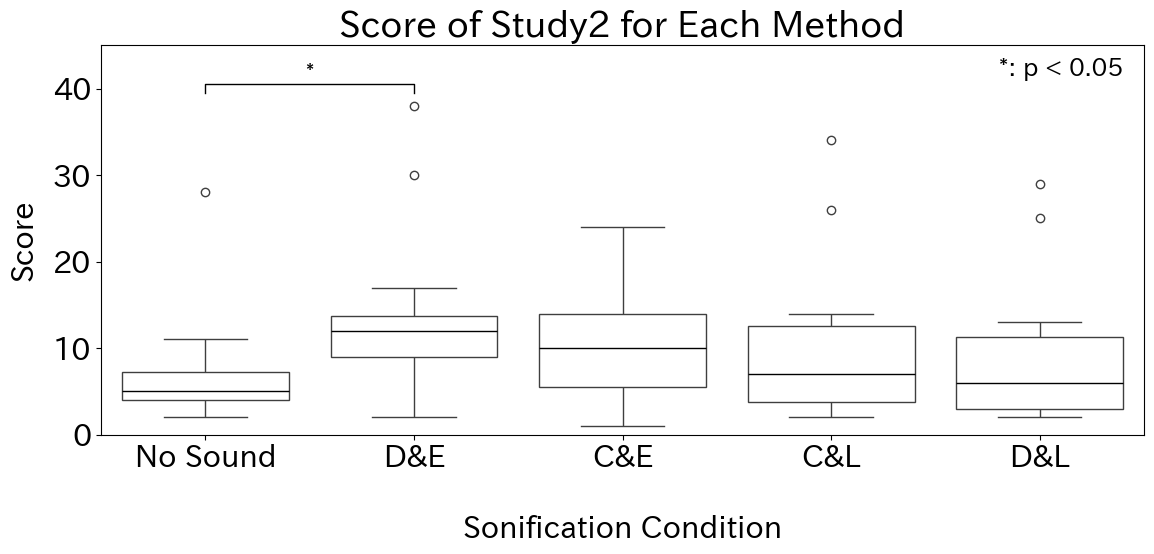

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Example DataFrame
# df_all = pd.DataFrame(...)

# Adding descriptive labels for Method
method_labels = {
    -1: 'No Sound',
    0: 'D&E',
    1: 'C&E',
    2: 'C&L',
    3: 'D&L',
}

# Adding labels to the DataFrame
df_all['Method_Label'] = df_all['Method'].map(method_labels)

# Adding significance asterisks and brackets
x1, x2 = 0, 1
y, h, col = df_all['Score'].max() +1.5, 1, 'k'
# for x2 in range(1, 5):


# Score Visualization
plt.figure(figsize=(12, 6))
# フォントサイズを設定
plt.rcParams.update({'font.size': 22})

plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1, c=col)
plt.text((x1 + x2) * .5, y + h, '*', ha='center', va='bottom', color=col, fontsize=16)

sns.boxplot(x='Method_Label', y='Score', data=df_all, boxprops=dict(facecolor='none'), medianprops=dict(color='black'))
plt.title('Score of Study2 for Each Method')
# Adding the annotation text
plt.text(4.4,43.65, '*: p < 0.05', horizontalalignment='right', verticalalignment='top', fontsize=18)


plt.xlabel('Sonification Condition', labelpad=30)
plt.ylabel('Score', labelpad=10)
plt.ylim(0, 45)
# plt.legend(title='Pointing Method', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import scipy.stats as stats

# 正規性の検定
results = []


for method in df_all['Method_Label'].unique():   
    stat, p_value = stats.shapiro(df_all[df_all['Method_Label'] == method]['Score'])  
    results.append({'Method_Label': method,'stat': stat, 'p_value': p_value    })
# 結果をデータフレームに変換
df_results = pd.DataFrame(results)

# 正規性の検定結果をCSVファイルとして保存
output_file = 'shapiro_wilk_results-all.csv'
df_results.to_csv(output_file, index=False)

print(f"Shapiro-Wilk検定結果が {output_file} に保存されました。")


Shapiro-Wilk検定結果が shapiro_wilk_results-all.csv に保存されました。


In [8]:
import scipy.stats as stats

# 正規性の検定
results = []
for method in df_all['Method_Label'].unique():
    # print(df_all['Method_Label'])
    stat, p_value = stats.shapiro(df_all[df_all['Method_Label'] == method]['Score'])
    results.append({'Method_Label': method,'stat': stat, 'p_value': p_value})
# stat, p_value = stats.shapiro(df_all['Score'])
# 結果をデータフレームに変換
df_results = pd.DataFrame(results)

# 正規性の検定結果をCSVファイルとして保存
output_file = 'shapiro_wilk_results.csv'
df_results.to_csv(output_file, index=False)

print(f"Shapiro-Wilk検定結果が {output_file} に保存されました。")

# 結果の一部を表示
df_results

Shapiro-Wilk検定結果が shapiro_wilk_results.csv に保存されました。


,Method_Label,stat,p_value
0,No Sound,0.654973,0.000056
1,D&E,0.820409,0.005151
2,C&E,0.958252,0.630212
3,C&L,0.777320,0.001383
4,D&L,0.785763,0.001773


In [9]:
from itertools import combinations
import numpy as np

# Wilcoxonの符号付順位検定
wilcoxon_results = []
methods = df_all['Method_Label'].unique()
num_comparisons = sum(1 for _ in combinations(methods, 2))


for method1, method2 in combinations(methods, 2):
    stat, p_value = stats.wilcoxon(df_all[df_all['Method_Label'] == method1]['Score'],
                                    df_all[df_all['Method_Label'] == method2]['Score'])
    wilcoxon_results.append({
        'Comparison': f'{method1} vs {method2}',
        'stat': stat,
        'p_value': p_value
    })

# 結果をデータフレームに変換
df_wilcoxon_results = pd.DataFrame(wilcoxon_results)

# ボンフェローニ補正
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value'] * num_comparisons
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value_bonferroni'].apply(lambda x: min(x, 1.0))

# 有意性の判断
df_wilcoxon_results['significant'] = df_wilcoxon_results['p_value_bonferroni'] < 0.05

# ボンフェローニ補正結果をCSVファイルとして保存
output_file_bonferroni = 'wilcoxon_bonferroni_results.csv'
df_wilcoxon_results.to_csv(output_file_bonferroni, index=False)

print(f"Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が {output_file_bonferroni} に保存されました。")

# 結果の一部を表示
df_wilcoxon_results


Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が wilcoxon_bonferroni_results.csv に保存されました。


/Users/takaharayouta/.pyenv/versions/3.10.12/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


,Comparison,stat,p_value,p_value_bonferroni,significant
0,No Sound vs D&E,10.0,0.001312,0.013123,True
1,No Sound vs C&E,26.0,0.053282,0.532819,False
2,No Sound vs C&L,34.0,0.138717,1.000000,False
3,No Sound vs D&L,54.0,0.495422,1.000000,False
4,D&E vs C&E,36.5,0.116669,1.000000,False
5,D&E vs C&L,24.0,0.040523,0.405225,False
6,D&E vs D&L,21.0,0.026603,0.266035,False
7,C&E vs C&L,43.0,0.549841,1.000000,False
8,C&E vs D&L,41.5,0.292115,1.000000,False
9,C&L vs D&L,55.0,0.775409,1.000000,False


In [10]:
from itertools import combinations
import numpy as np

# Wilcoxonの符号付順位検定
wilcoxon_results = []
methods = df_all['Method_Label'].unique()
num_comparisons = 4


for method in methods:
    if method !='No Sound':
        data1 = df_all[df_all['Method_Label'] == method]['Score']
        data2 = df_all[df_all['Method_Label'] == 'No Sound']['Score']
        stat, p_value = stats.wilcoxon(data1,data2)
        z_value = stats.norm.ppf(p_value / 2)
        n = len(data1)
        # print(n)
        effect_size_r = z_value / np.sqrt(n)
        wilcoxon_results.append({
            'Comparison': f'{method} vs No Sound',
            'stat': stat,
            'p_value': p_value,
            'effect_size_r': effect_size_r
        })

# 結果をデータフレームに変換
df_wilcoxon_results = pd.DataFrame(wilcoxon_results)

# ボンフェローニ補正
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value'] * num_comparisons
df_wilcoxon_results['p_value_bonferroni'] = df_wilcoxon_results['p_value_bonferroni'].apply(lambda x: min(x, 1.0))

# 有意性の判断
df_wilcoxon_results['significant'] = df_wilcoxon_results['p_value_bonferroni'] < 0.05

# ボンフェローニ補正結果をCSVファイルとして保存
output_file_bonferroni = 'wilcoxon_bonferroni_results.csv'
df_wilcoxon_results.to_csv(output_file_bonferroni, index=False)

print(f"Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が {output_file_bonferroni} に保存されました。")

# 結果の一部を表示
df_wilcoxon_results


Wilcoxonの符号付順位検定結果（ボンフェローニ補正適用）が wilcoxon_bonferroni_results.csv に保存されました。


/Users/takaharayouta/.pyenv/versions/3.10.12/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


,Comparison,stat,p_value,effect_size_r,p_value_bonferroni,significant
0,D&E vs No Sound,10.0,0.001312,-0.803321,0.005249,True
1,C&E vs No Sound,26.0,0.053282,-0.483157,0.213127,False
2,C&L vs No Sound,34.0,0.138717,-0.370147,0.554867,False
3,D&L vs No Sound,54.0,0.495422,-0.170427,1.000000,False


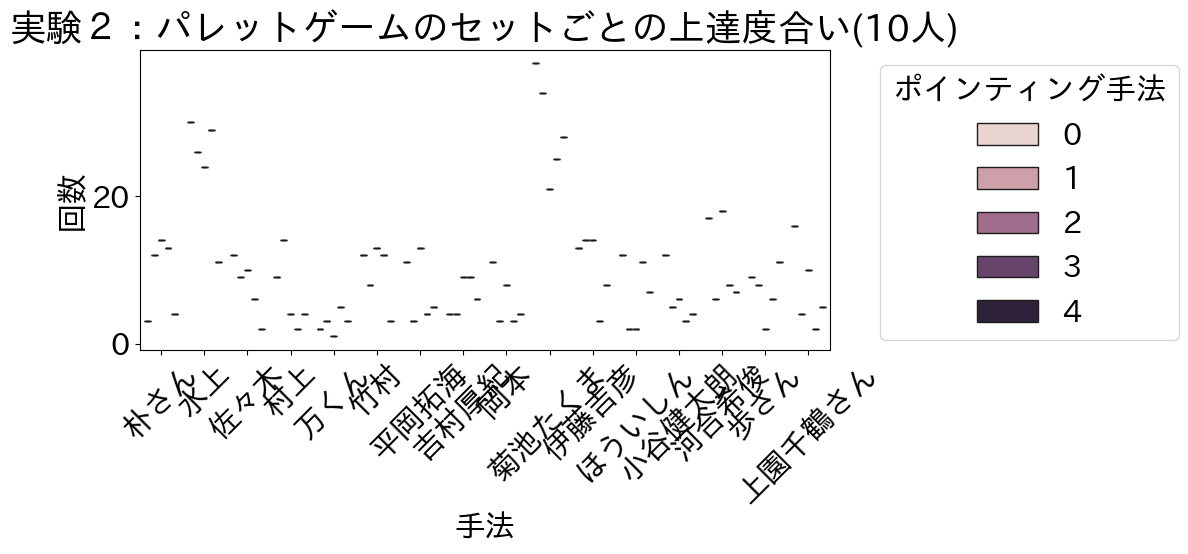

In [11]:
# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subject', y='Score',hue='Order', data=df_all)
plt.title('実験２：パレットゲームのセットごとの上達度合い(10人)')
plt.xlabel('手法')
plt.ylabel('回数')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/mf/llf661b147ggb7t1v66lwxkr0000gn/T/ipykernel_11598/712377271.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='Score', hue='Order', data=df_all, ci=None)


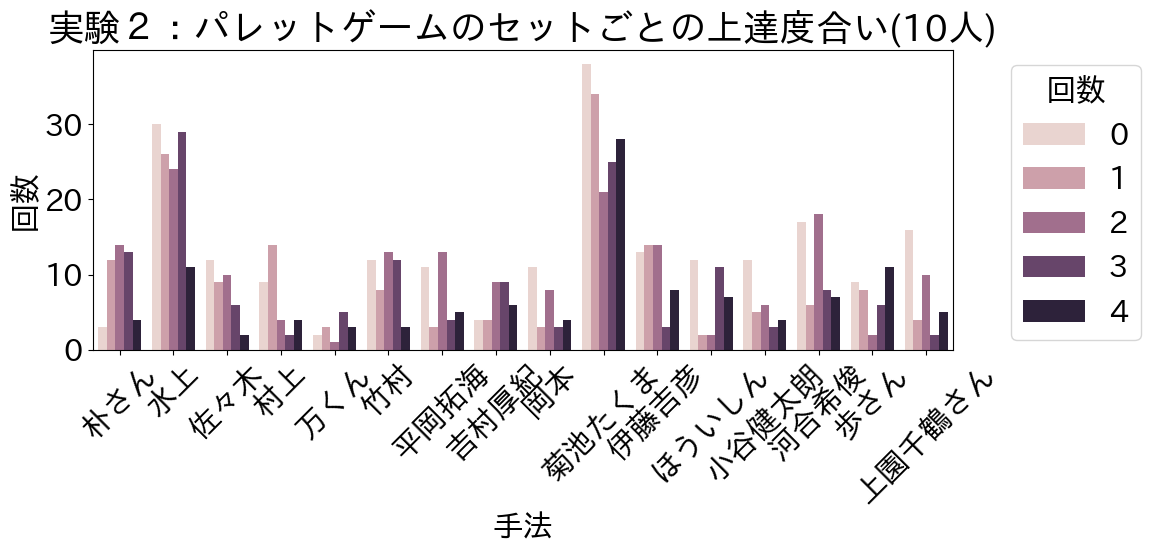

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure settings
plt.figure(figsize=(12, 6))

# Barplot
sns.barplot(x='Subject', y='Score', hue='Order', data=df_all, ci=None)

# Titles and labels
plt.title('実験２：パレットゲームのセットごとの上達度合い(10人)')
plt.xlabel('手法')
plt.ylabel('回数')
plt.legend(title='回数', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
